### Build a model for image processing

In [3]:
#required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
#keras function to call our dataset
mnist = keras.datasets.mnist
#this gives us 2 lists
#one list is for training our model and other for testing/accurate our final model
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

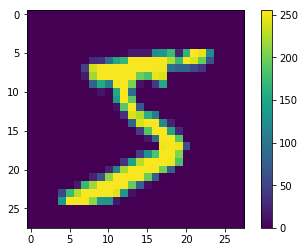

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

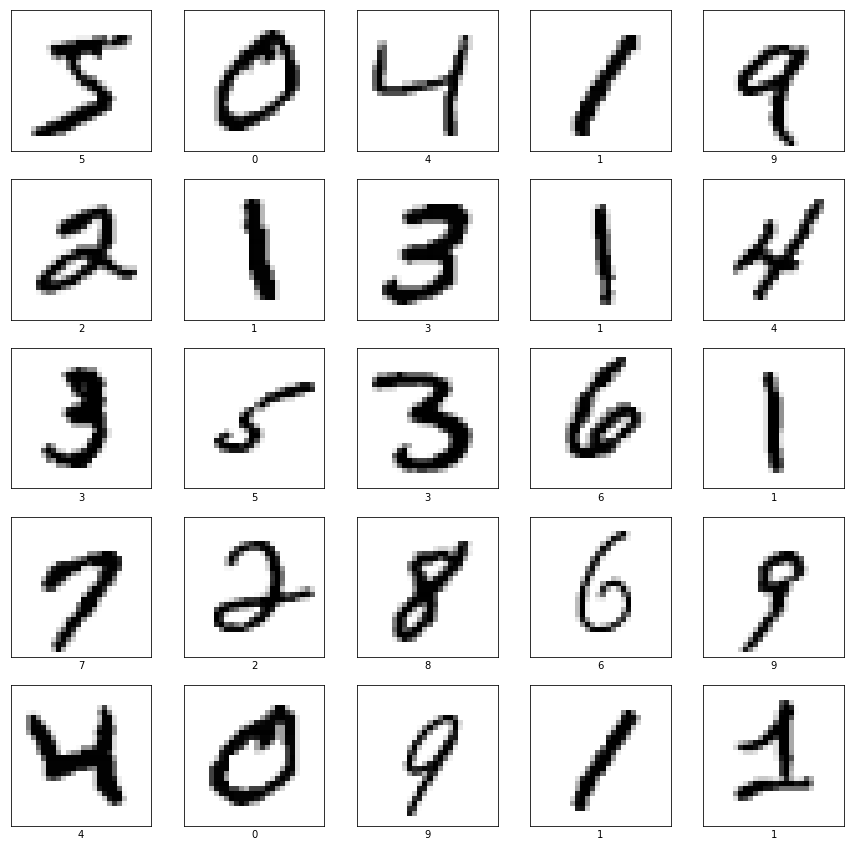

In [11]:
plt.figure(figsize = (15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),#we declared our 1st layer to be flatten type, followed by 2 Dense layers
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
#we applied non linear function relu to calculate our 10 output classes
#using softmax to create the probability distribution that sums to 1

In [13]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2597 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1119 - acc: 0.9672
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0765 - acc: 0.9773
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0573 - acc: 0.9826
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0442 - acc: 0.9861


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy :", test_acc)

10000/10000 [==============================] - 0s 39us/step
Test Accuracy : 0.9751


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([9.6084349e-08, 5.1702737e-10, 4.1516637e-06, 2.9862118e-05,
       2.0200032e-13, 5.1875357e-08, 3.0767400e-15, 9.9996543e-01,
       1.5356278e-08, 3.7670782e-07], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
test_labels[0]

7

In [24]:
np.argmax(predictions[67])

4

In [25]:
test_labels[67]

4

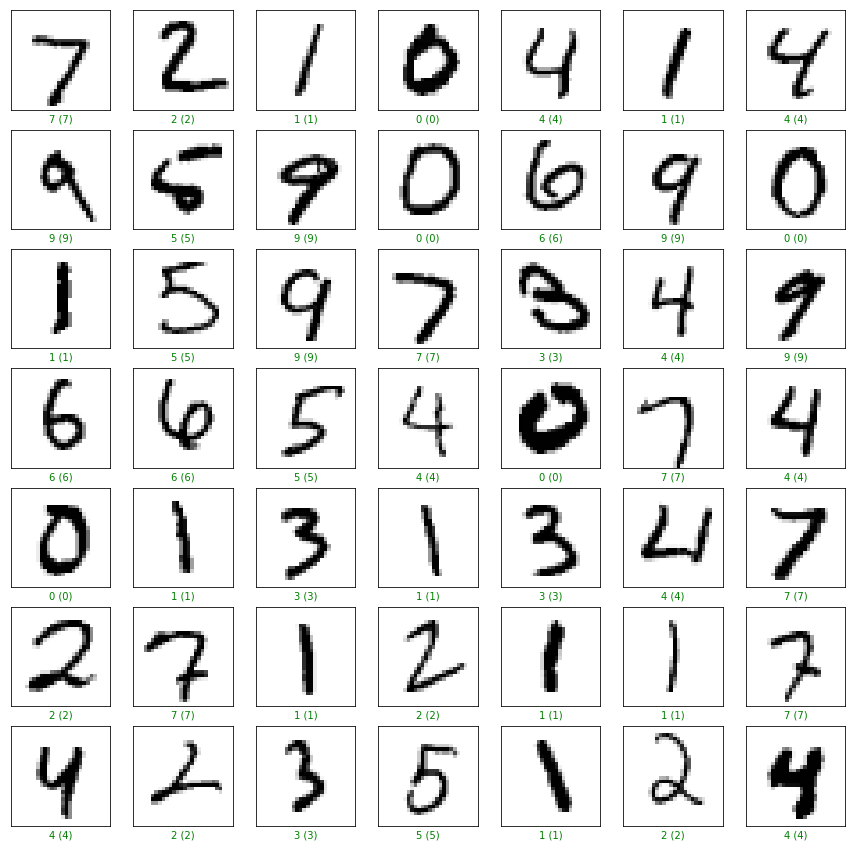

In [23]:
#plot first 25 test images, predicted labels and their tre labels
# color green is correct prediction and red is incorrect prediction

plt.figure(figsize = (15, 15))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_labels = np.argmax(predictions[i])
    true_labels = test_labels[i]
    if predicted_labels == true_labels:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})". format(predicted_labels, true_labels), color=color)
        